### INCOME CLASSIFICATION PROJECT



### About Dataset

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices.

Fields
The dataset contains 16 columns
Target filed: Income
-- The income is divide into two classes: <=50K and >50K
Number of attributes: 14
-- These are the demographics and other features to describe a person

We can explore the possibility in predicting income level based on the individual’s personal information.

Acknowledgements
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

In [1]:
# importing relevant libraries and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max.columns',None)

In [3]:
# Reading the dataset

df=pd.read_csv("C:/Users/Hariom/Downloads/Telegram Desktop/adult.csv")

In [4]:
# shape of dataset

print(df.shape)

(32561, 15)


The data have 32561 rows and 15 attributes

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# Basic information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Statistics of the dataset

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


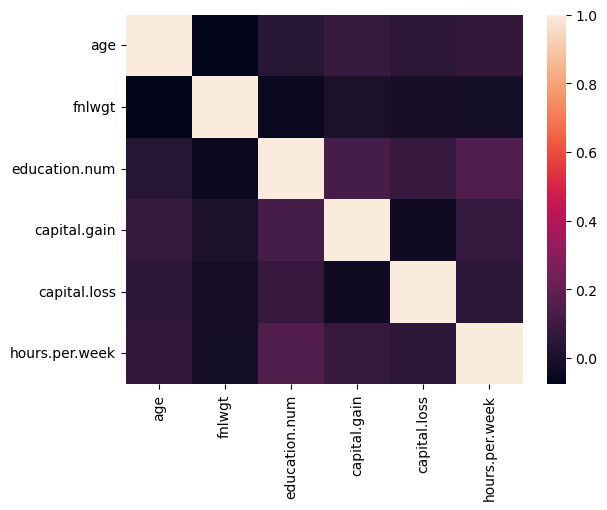

In [8]:
# correlation between variables

sns.heatmap(df.corr());

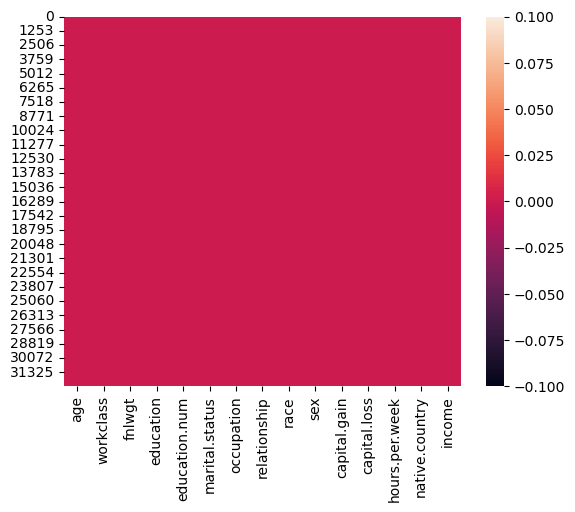

In [9]:
# null values with heatmap

sns.heatmap(df.isnull());

This shows that the dataset han no NAN values

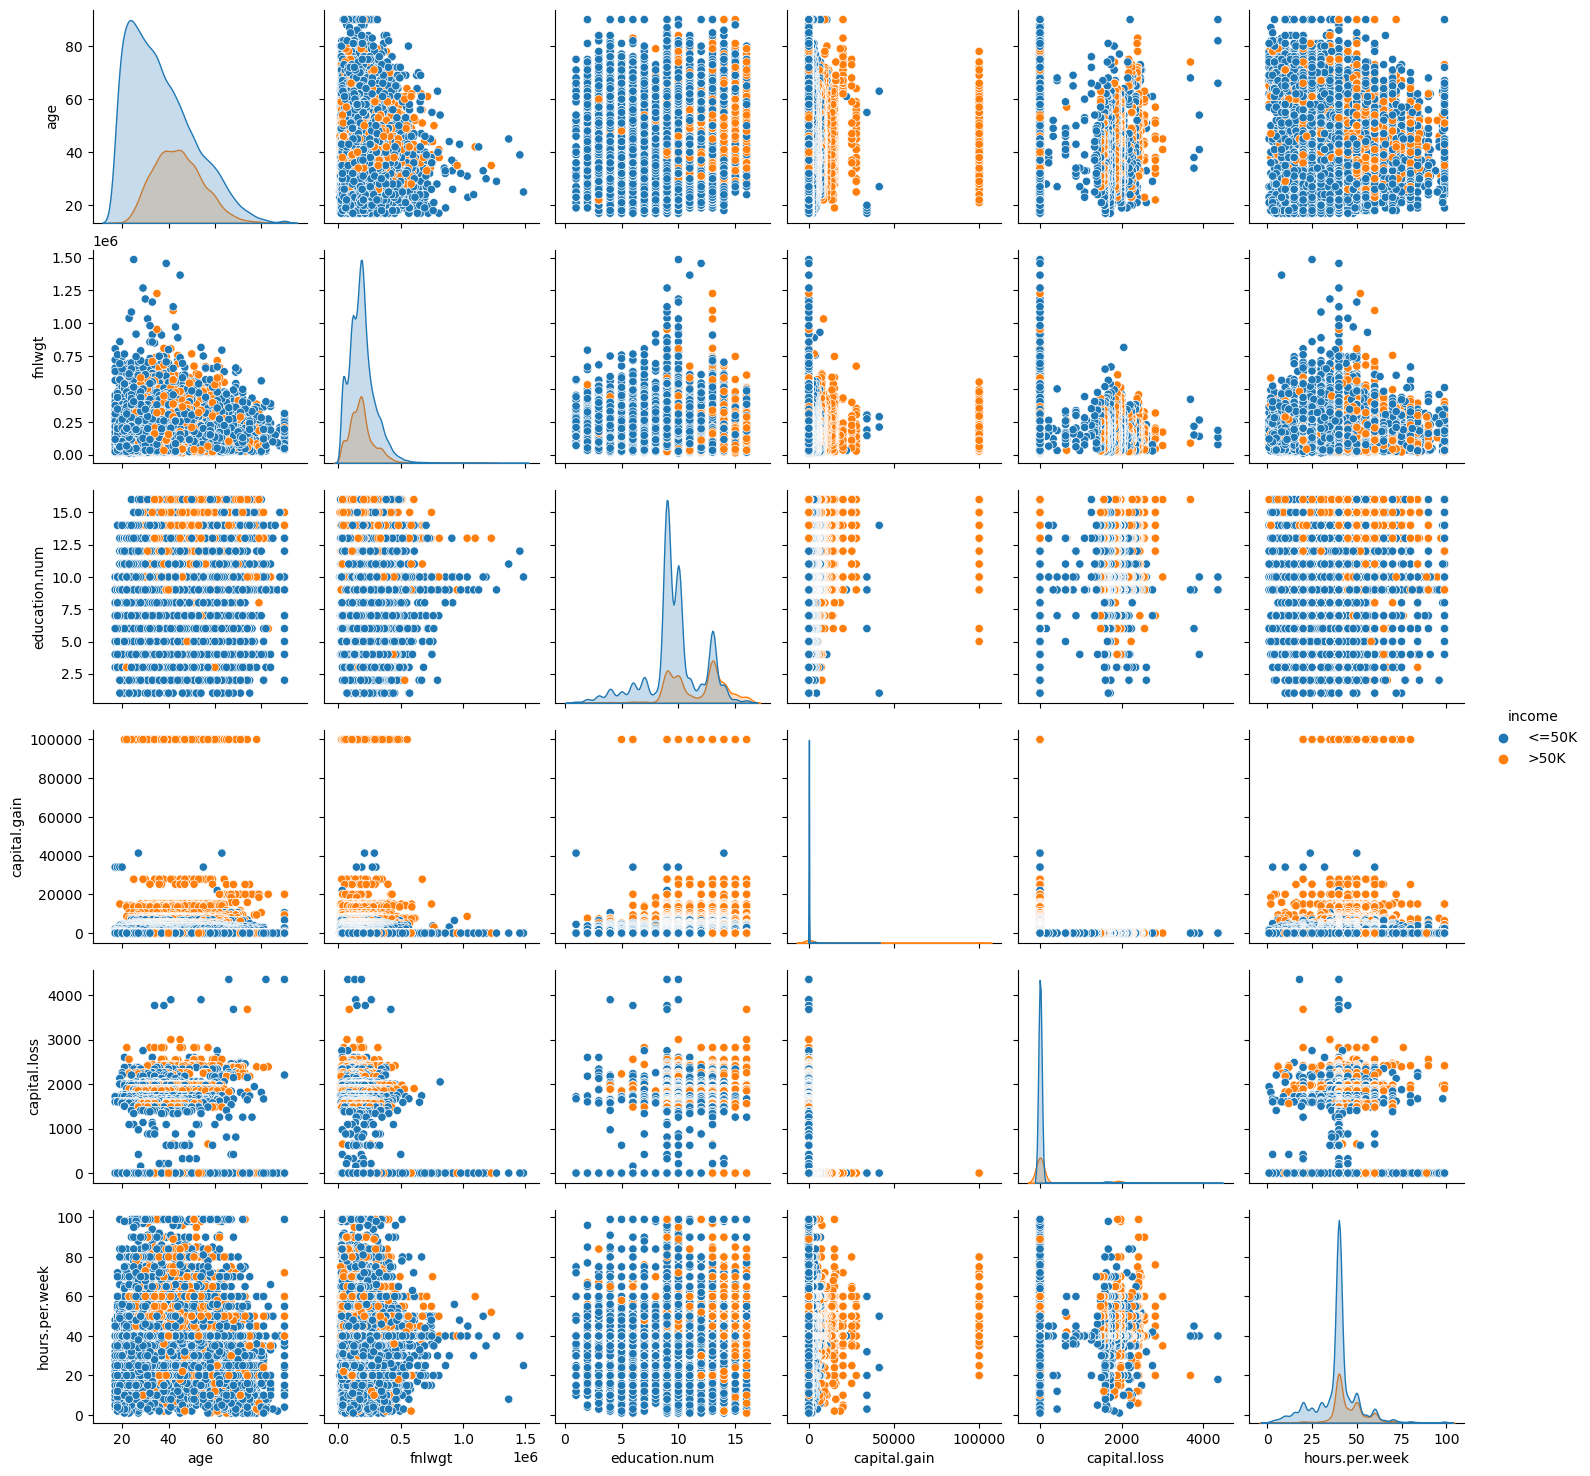

In [10]:
# pair plot of the dataset

sns.pairplot(df,hue='income')

### Numerical variables

In [11]:
# list of numerical variables

numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']

print('Number of numerical variables are: ',len(numerical_features))

# visualize the numerical variables

df[numerical_features].head()

Number of numerical variables are:  6


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


### Discrete variables

In [12]:
# Numerical variables are usually of 2 types 
# Continuos variable and Discrete variables

discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_features)))

Discrete Variables Count: 1


In [13]:
df[discrete_features].head()

,education.num
0,9
1,9
2,10
3,4
4,10


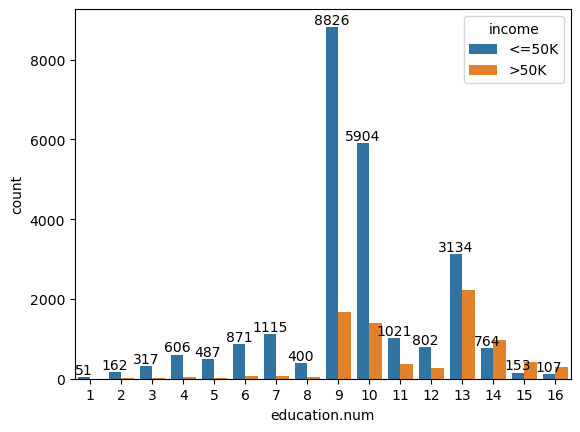

In [14]:
# Let's Find the realationship between Education.num and income

ax=sns.countplot(x=df['education.num'],data=df,hue='income')
ax.bar_label(ax.containers[0])
plt.show()


### Continuous variables

In [15]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print('Continuous features count: {}'.format(len(continuous_features)))

Continuous features count: 5


In [16]:
df[continuous_features].head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
0,90,77053,0,4356,40
1,82,132870,0,4356,18
2,66,186061,0,4356,40
3,54,140359,0,3900,40
4,41,264663,0,3900,40


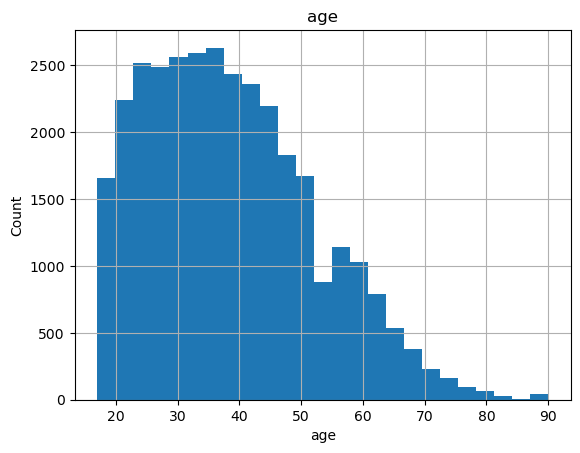

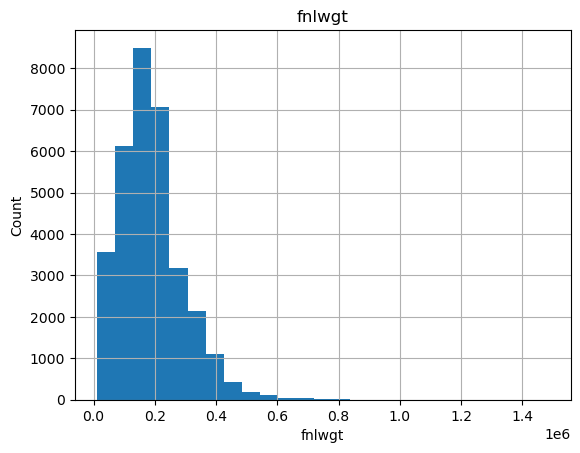

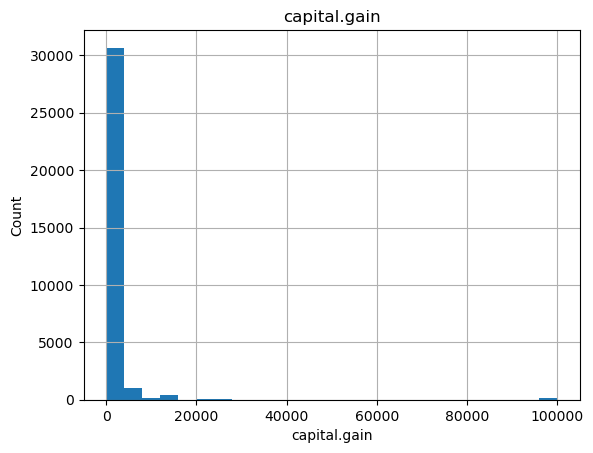

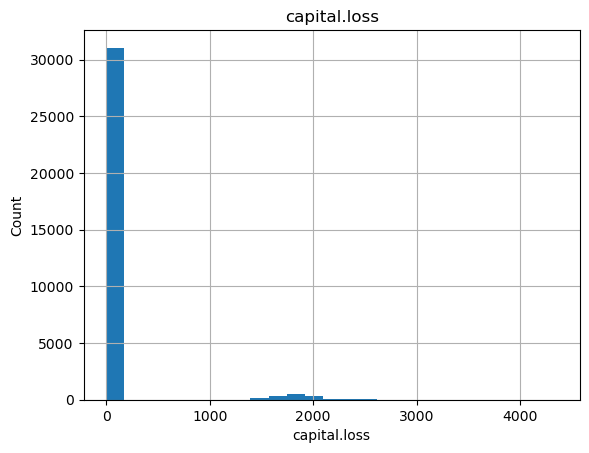

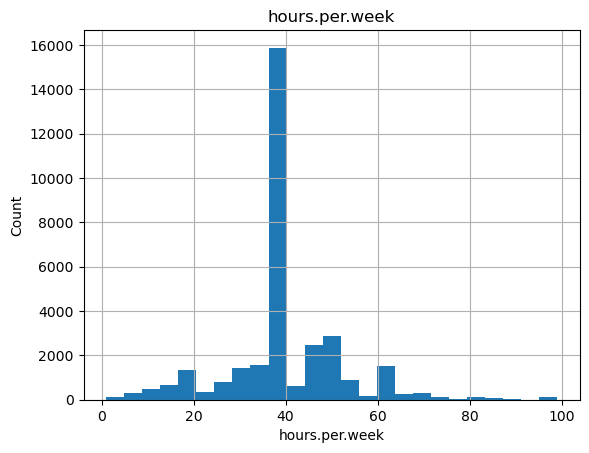

In [17]:
# Let's analyze the continuous values by creating histpgram to understand the data

for feature in continuous_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    

we can that none of the continuous variable follows normal distribution

we will be doing logarithmic transformation

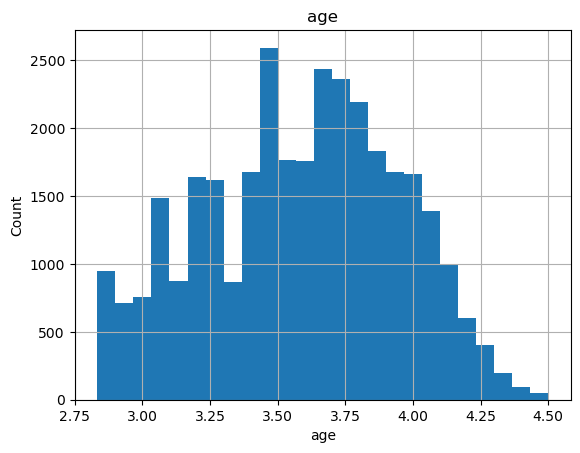

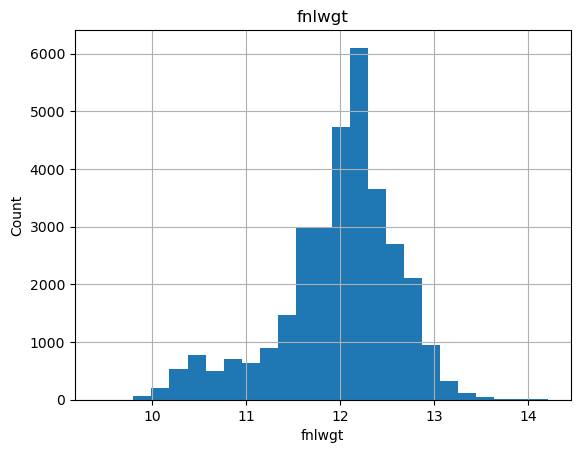

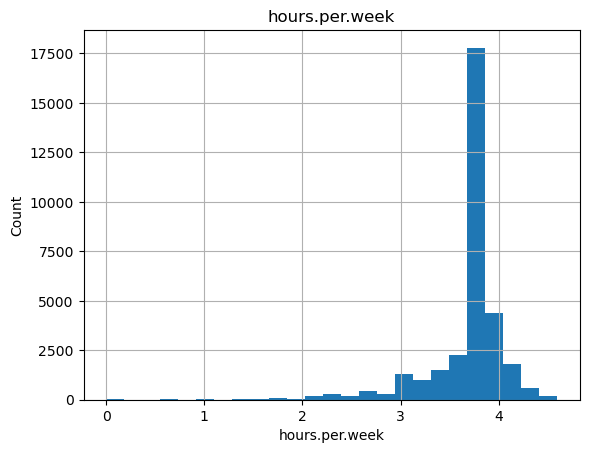

In [18]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

### Outliers

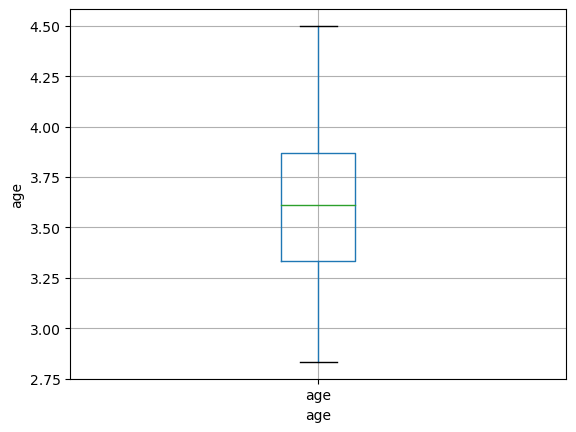

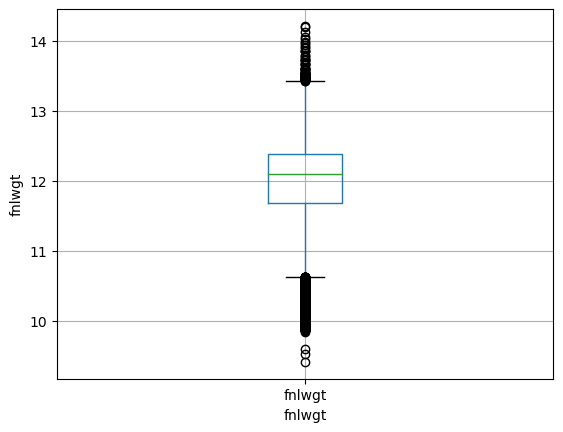

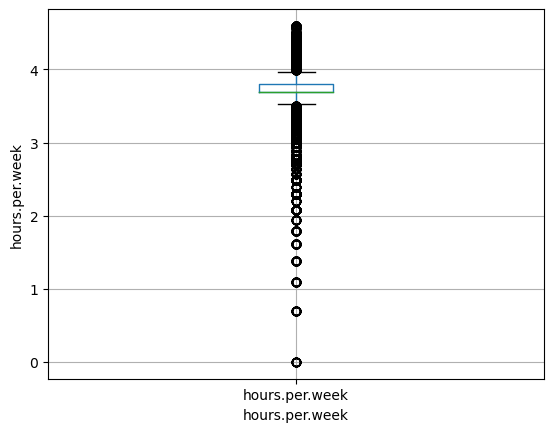

In [19]:
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.show()

We have ouliers in hours.per.week and fnlwgt

### Categorical variables

In [20]:
# Total number of categorical features 

categorical_features=[feature for feature in df.columns if data[feature].dtype=='O' ]
print('Categorical features count: ',len(categorical_features))

Categorical features count:  9


In [21]:
df[categorical_features]

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [22]:
# Unique values in each categorical features

for feature in categorical_features:
    print('The feature is {} and the number of categories are {}'.format(feature,df[feature].nunique()))

The feature is workclass and the number of categories are 9
The feature is education and the number of categories are 16
The feature is marital.status and the number of categories are 7
The feature is occupation and the number of categories are 15
The feature is relationship and the number of categories are 6
The feature is race and the number of categories are 5
The feature is sex and the number of categories are 2
The feature is native.country and the number of categories are 42
The feature is income and the number of categories are 2


In [23]:
categorical_features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

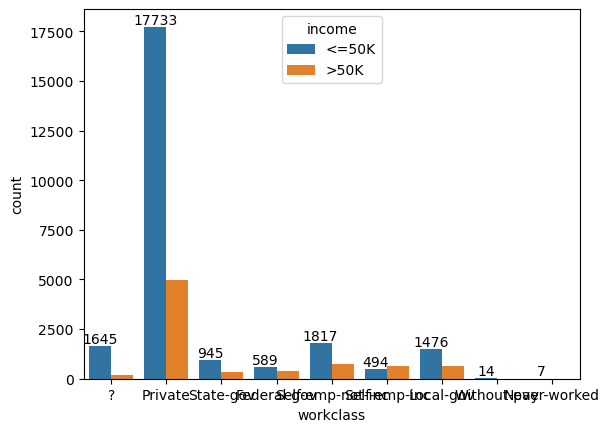

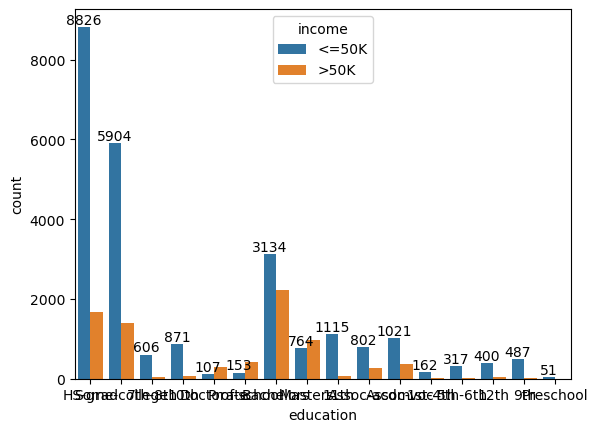

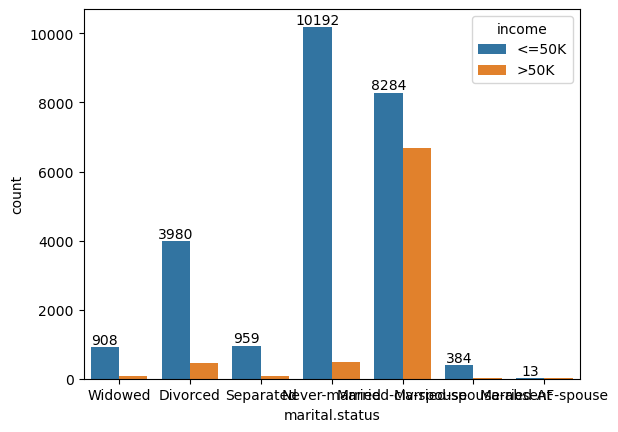

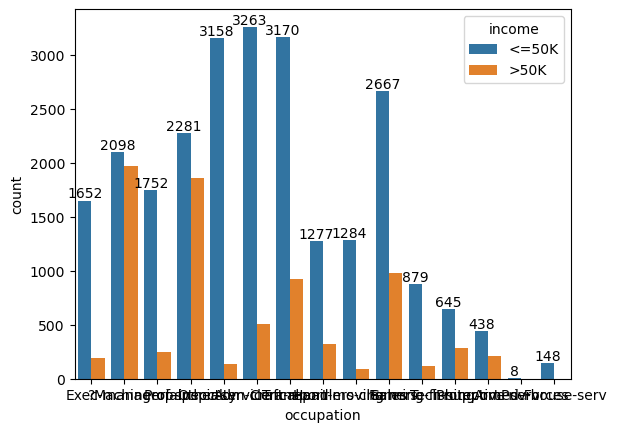

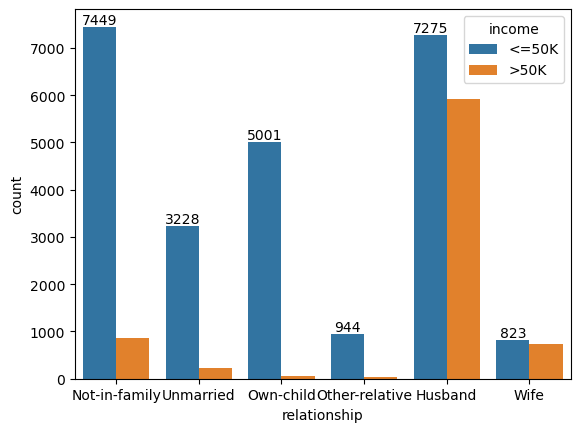

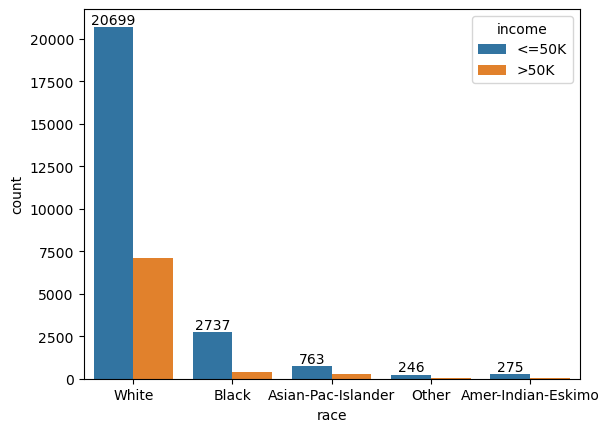

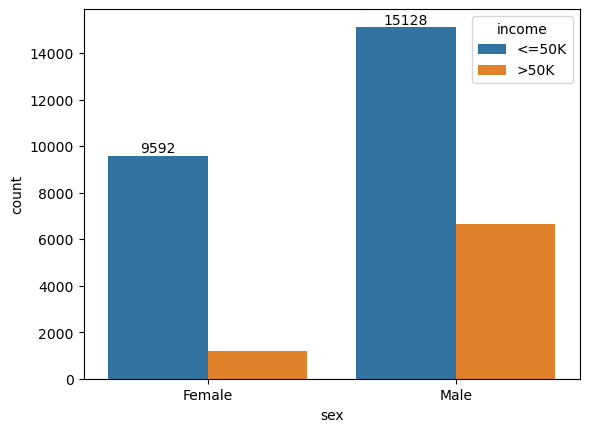

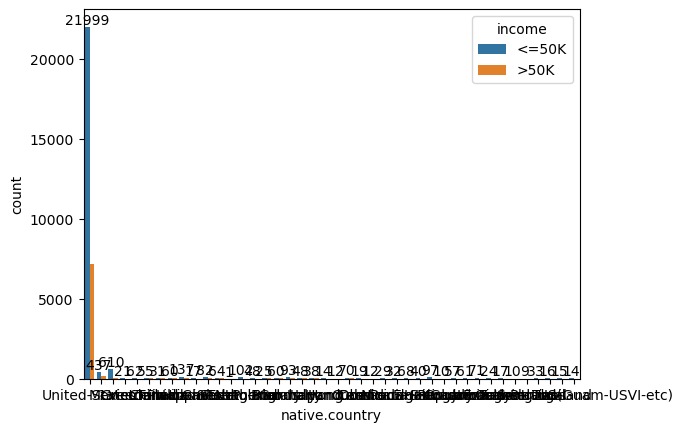

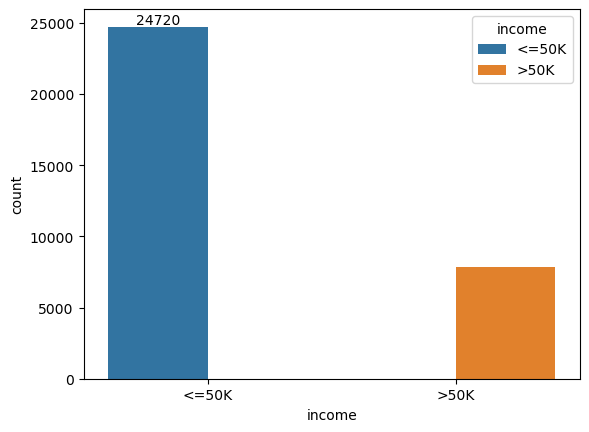

In [24]:
# Now we will study the relationship of categorical variables with income

for feature in categorical_features:
    ax=sns.countplot(x=df[feature],data=df,hue='income')
    ax.bar_label(ax.containers[0])
    plt.show()


### Feature Engineering

In [25]:
# MISSING VALUES

In [26]:
# Fisrt lets handle categorical features which are missing

features_nan=[feature for feature in df.columns if '?' in df[feature].unique() and df[feature].dtype=='O']

features_nan

C:\Users\Hariom\AppData\Local\Temp\ipykernel_37436\3945008927.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  features_nan=[feature for feature in df.columns if '?' in df[feature].unique() and df[feature].dtype=='O']


['workclass', 'occupation', 'native.country']

In [27]:
for feature in features_nan:
    print("{}: {} - '?' missing values".format(feature,df[df[feature]=='?'].shape[0]))

workclass: 1836 - '?' missing values
occupation: 1843 - '?' missing values
native.country: 583 - '?' missing values


In [28]:
# Now replace missing values with a new label

def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].replace('?',value='Other')
    return data
df=replace_cat_feature(df,features_nan)

df[features_nan].isnull().sum()

workclass         0
occupation        0
native.country    0
dtype: int64

In [29]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Other,77053,HS-grad,9,Widowed,Other,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Other,186061,Some-college,10,Widowed,Other,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [30]:
# Now lets check for the numerical variables that contains missing vales

numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

# we will print the numerical nan variables nad percentage of missing vales

for feature in numerical_with_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

In [31]:
# NUMERICAL VARIABLES

Since the numerical variables are skewed we will perform log normal distribution

In [32]:
num_features=['age','fnlwgt','hours.per.week']

for feature in num_features:
    df[feature]=np.log(df[feature])

In [33]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.499810,Other,11.252249,HS-grad,9,Widowed,Other,Not-in-family,White,Female,0,4356,3.688879,United-States,<=50K
1,4.406719,Private,11.797126,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,2.890372,United-States,<=50K
2,4.189655,Other,12.133830,Some-college,10,Widowed,Other,Unmarried,Black,Female,0,4356,3.688879,United-States,<=50K
3,3.988984,Private,11.851959,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,3.688879,United-States,<=50K
4,3.713572,Private,12.486213,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,3.688879,United-States,<=50K


### Handling rare categorical feature

We will remove categorical variables that are present less than 1% of the observations

In [34]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

In [35]:
for feature in categorical_features:
    temp=df.groupby(feature)['income'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [36]:
df=pd.get_dummies(data=df,columns=categorical_features,drop_first=True)

In [37]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Rare_var,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_12th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Rare_var,education_Some-college,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Rare_var,marital.status_Separated,marital.status_Widowed,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other,occupation_Other-service,occupation_Prof-specialty,occupation_Protective-serv,occupation_Rare_var,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_Rare_var,race_White,sex_Male,native.country_Other,native.country_Rare_var,native.country_United-States,income_>50K
0,4.499810,11.252249,9,0,4356,3.688879,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,4.406719,11.797126,9,0,4356,2.890372,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,4.189655,12.133830,10,0,4356,3.688879,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,3.988984,11.851959,4,0,3900,3.688879,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,3.713572,12.486213,10,0,3900,3.688879,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [38]:
# transforming the categorical dataset
'''
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for feature in categorical_features:
    df[feature]=le.fit_transform(df[feature])
    '''

'\nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\n\nfor feature in categorical_features:\n    df[feature]=le.fit_transform(df[feature])\n    '

In [39]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Rare_var,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_12th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Rare_var,education_Some-college,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Rare_var,marital.status_Separated,marital.status_Widowed,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other,occupation_Other-service,occupation_Prof-specialty,occupation_Protective-serv,occupation_Rare_var,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_Rare_var,race_White,sex_Male,native.country_Other,native.country_Rare_var,native.country_United-States,income_>50K
0,4.499810,11.252249,9,0,4356,3.688879,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1,4.406719,11.797126,9,0,4356,2.890372,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,4.189655,12.133830,10,0,4356,3.688879,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,3.988984,11.851959,4,0,3900,3.688879,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,3.713572,12.486213,10,0,3900,3.688879,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


### FEATURE SCALING

In [40]:
feature_scale=[feature for feature in df.columns if feature not in ['income_>50K']]



from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [41]:
# transform the train and test set, and add on the income variables

df1=pd.concat([df[['income_>50K']].reset_index(drop=True),pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],axis=1)

In [42]:
df1.head()

,income_>50K,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Rare_var,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_11th,education_12th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Rare_var,education_Some-college,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Rare_var,marital.status_Separated,marital.status_Widowed,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other,occupation_Other-service,occupation_Prof-specialty,occupation_Protective-serv,occupation_Rare_var,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Black,race_Rare_var,race_White,sex_Male,native.country_Other,native.country_Rare_var,native.country_United-States
0,0,1.000000,0.382955,0.533333,0.0,1.000000,0.802782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,0.944143,0.496600,0.533333,0.0,1.000000,0.629009,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.813899,0.566825,0.600000,0.0,1.000000,0.802782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.693492,0.508036,0.200000,0.0,0.895317,0.802782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,0.528238,0.640321,0.600000,0.0,0.895317,0.802782,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [43]:
# capture independent features

x=df1.drop(['income_>50K'],axis=1)

# capture dependent feature
y=df1[['income_>50K']]

In [44]:
# impoting relevant library for splitting data

from sklearn.model_selection import train_test_split

# splitting into training and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.15,random_state=8)

### MODEL DEVELOPMENT

In [45]:
# Now fitting model for logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model1=LogisticRegression()

In [48]:
model1.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
model1.coef_

array([[ 2.21699320e+00,  5.57881218e-01,  2.14577982e+00,
         1.69783163e+01,  2.41399229e+00,  4.62710089e+00,
        -5.91430674e-01, -4.23239881e-01, -4.25541600e-01,
        -1.26781567e+00, -2.37644301e-01, -8.65045365e-01,
        -7.65433854e-01, -2.79363337e-01,  1.27705307e-02,
        -2.48966343e-01, -4.02695844e-01, -2.01545226e-01,
         3.49768381e-01,  4.48720132e-01,  7.35493133e-01,
         1.38101526e+00,  2.17471009e-01,  9.06626910e-01,
         1.26061247e+00, -4.04291741e-01,  4.15343341e-01,
         1.81236780e+00, -1.63252683e-02, -3.87813897e-01,
         1.85815956e+00, -1.63271547e-01,  1.31641601e-01,
         1.17717207e-01,  7.81012564e-01, -8.63063744e-01,
        -6.02573031e-01, -2.47275961e-01, -5.07864467e-01,
        -8.51737866e-01,  5.84311029e-01,  6.12685384e-01,
        -1.12730107e+00,  3.17056363e-01,  6.47170445e-01,
        -5.45867574e-02,  2.60848763e-01, -5.41523324e-01,
        -8.30147701e-01,  6.16705792e-02,  1.29675747e+0

In [50]:
model1.intercept_

array([-10.60309019])

In [51]:
model1.score(x_test,y_test)

0.8536335721596725

In [52]:
pred_test=model1.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [54]:
confusion_matrix(y_test,pred_test)

array([[3463,  240],
       [ 475,  707]], dtype=int64)

In [55]:
accuracy_score(y_test,pred_test)

0.8536335721596725

In [56]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3703
           1       0.75      0.60      0.66      1182

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



In [57]:
# Now fitting model for KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.8321392016376663


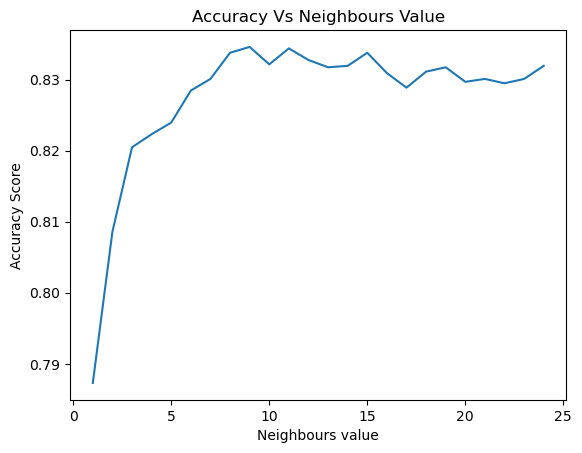

In [59]:
accuracy=0
accuracy_graph=[]
n_neighbour=1
for i in range(1,25):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    a_score=accuracy_score(y_test,pred)
    accuracy_graph.append(a_score)
    if a_score>accuracy:
        n_neighbour+=1
        accuracy=a_score
model2=KNeighborsClassifier(n_neighbors=n_neighbour)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
a=accuracy_score(y_test,y_pred)
print(a)

b=np.arange(1,25)
plt.plot(b,accuracy_graph)
plt.xlabel("Neighbours value")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Vs Neighbours Value")
plt.show();

Since we can see in the graph that after N=10 gragh is stable i.e. no updowns in the accuracy

we will take n=10

In [60]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
a_score=accuracy_score(y_test,pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
a_score

0.8321392016376663

We get a accuracy score of 0.8311 from the model

In [62]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3703
           1       0.70      0.53      0.60      1182

    accuracy                           0.83      4885
   macro avg       0.78      0.73      0.75      4885
weighted avg       0.82      0.83      0.82      4885



In [63]:
confusion_matrix(y_test,pred)

array([[3439,  264],
       [ 556,  626]], dtype=int64)

In [64]:
# Now fitting the model for RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model3=RandomForestClassifier(n_estimators=100)

In [67]:
model3.fit(x_train,y_train)

C:\Users\Hariom\AppData\Local\Temp\ipykernel_37436\1498929805.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(x_train,y_train)


RandomForestClassifier()

In [68]:
pred_rc=model3.predict(x_test)

In [69]:
accuracy_score(y_test,pred_rc)

0.8548618219037871

We are getting a accuracy score of 0.8581 from the model

In [70]:
# Now since we are getting higher accuracy score with RandomForrest classifier 
# we will go for that

In [71]:
# the classification report with Random Forrest classifier 
print(classification_report(y_test,pred_rc))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3703
           1       0.74      0.62      0.67      1182

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



In [72]:
# cross validation

from sklearn.model_selection import StratifiedKFold, cross_val_score
k_folds = StratifiedKFold(n_splits = 5)
scores = cross_val_score(model1, x, y, cv = k_folds)
print(scores)
print(np.mean(scores))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[0.86196837 0.85718673 0.82616708 0.8355344  0.83000614]
0.842172543968951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
